# Homework

In [2]:
# imports
from scipy.stats import hypergeom, binom, poisson, expon
import matplotlib.pyplot as plt
import numpy as np
import math
# import random

### 4.45 --> Binomial
In an attempt to decrease drunk driving, police set up vehicle checkpoints during the July 4 evening. The police randomly select vehicles to be stopped for “informational” checks. On a particular roadway, assume that 20% of all drivers have a blood alcohol level above the legal limit. For a random sample of 15 vehicles, compute the following probabilities:

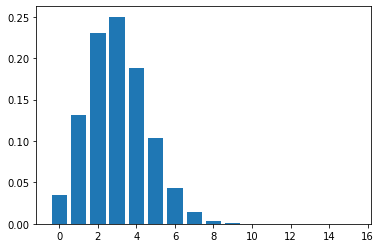

In [3]:
# variable setup
p = 0.2
n = 15

comb_numer = math.factorial(n)
# get mean and variance
# mean, var = binom.stats(n, p)
# set values for distribution range
x = np.arange(0, n+1)
# set distribution
dist = binom(n, p)
# set pmf
pmf_dist = dist.pmf(x)
# show distribution
plt.bar(x, pmf_dist)
plt.show()

In [4]:
# a - All 15 drivers will have a blood alcohol level exceeding the legal limit

# using defined distribution
# print(dist.pmf(15))

# re/set probability
prob = 0

# define test values
test_val = 15
test_val_diff = n - test_val

# set variables for calculation
comb = comb_numer / (math.factorial(test_val) * math.factorial(test_val_diff))
success = p**test_val
fail = (1-p)**test_val_diff

# calculate probability defined by formula
prob = comb * success * fail
print(prob)

3.276800000000003e-11


In [5]:
# b - Exactly 6 of the 15 drivers will exceed the legal limit.

# using defined distribution
# print(dist.pmf(6))

# re/set probability
prob = 0
# define test values
test_val = 6
test_val_diff = n - test_val

# set variables for calculation
comb = comb_numer / (math.factorial(test_val) * math.factorial(test_val_diff))
success = p**test_val
fail = (1-p)**test_val_diff

# calculate probability defined by formula
prob = (comb * success * fail)
print(prob)

0.04299262263296003


In [6]:
# c - Of the 15 drivers, 6 or more will exceed the legal limit.

# re/set probability
prob = 0
prob_sum = 0
# define test value, select less than test value. to include n, submit n + 1
test_val = 6
# set variable to loop through all iterations through selection
i = 0

while i < test_val:
    test_val_diff = n - i

    # set variables for calculation
    comb = comb_numer / (math.factorial(i) * math.factorial(test_val_diff))
    success = p**i
    fail = (1-p)**test_val_diff

    # calculate probability defined by formula
    prob = comb * success * fail
    # print (f"Prob of {i} = {round(prob, 2)}")
    prob_sum += prob
    # print(f"{i}, {comb}, {success}, {fail}, {prob}")
    i += 1

print(1 - prob_sum)

0.06105142961766319


In [7]:
# d - All 15 drivers will have a blood alcohol level within the legal limit.
# using defined distribution
# print(dist.pmf(0))

# re/set probability
prob = 0
# define test values
test_val = 0
test_val_diff = n - test_val

# set variables for calculation
comb = comb_numer / (math.factorial(test_val) * math.factorial(test_val_diff))
success = p**test_val
fail = (1-p)**test_val_diff

# calculate probability defined by formula
prob = (comb * success * fail)
print(prob)

0.03518437208883203


### 4.50 --> Poisson
Customers arrive at a grocery store checkout at a rate of six per 30 minutes during the hours of 5 p.m. and 7 p.m. during the workweek. Let C be the number of customers arriving at the checkout during any 30-minute period of time. The management of the store wants to determine the frequency of the following events. Compute the probabilities of these events

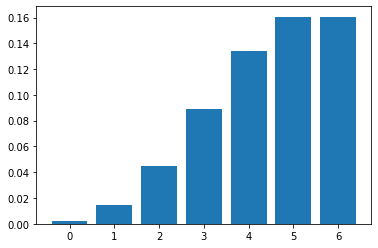

In [8]:
# variable setup
mins = 30
customers = 6
# customers per minute (needs to be in same time space as question)
C = mu = lam = customers
# set values for distribution range
x = np.arange(0, customers+1)
# set distribution
dist = poisson(lam)
# set pmf
pmf_dist = dist.pmf(x)
# show distribution
plt.bar(x, pmf_dist)
plt.show()

In [11]:
# a. No customers arrive.
# using distribution function
# print(dist.pmf(0))

# re/set probability
prob = 0
# set test value
test_val = 0
t = 1

# calculate probability
prob = (((lam*t)**test_val)*(math.e**(-lam*t))) / math.factorial(test_val)
print(prob)

0.0024787521766663594


In [19]:
# b. More than six customers arrive.
# using distribution function
# print(1 - dist.cdf(6))

# re/set probability
prob = 0
prob_sum = 0
# set test value
test_val = 6
t = 1
i = 0

# calculate probability
while i <= test_val:
    prob = (((lam*t)**i)*(math.e**(-lam*t))) / math.factorial(i)
    # print(prob)
    i += 1
    prob_sum += prob

print(1 - prob_sum)

0.3936972175874085


In [23]:
# c. At most three customers arrive.
# using distribution function
# print(dist.cdf(3))

# re/set probability
prob = 0
# set test value
test_val = 3
prob_sum = 0
t = 1
i = 0
# calculate probability
while i <= test_val:
    prob = (((lam*t)**i) * (math.e**(-lam*t))) / math.factorial(i)
    # print(prob)
    i += 1
    prob_sum += prob
    
print(prob_sum)

0.15120388277664792


### Word 1 --> Hypergeometric
A company needed to downsize one department having 30 people – 12 women and 18 men.  Ten people were laid off, and upper management said the layoffs were done randomly.  However of the 10 people laid off, 8 were women. Using the hypergeomentric distribution find the probability of 8 or more women being laid off by chance alone.

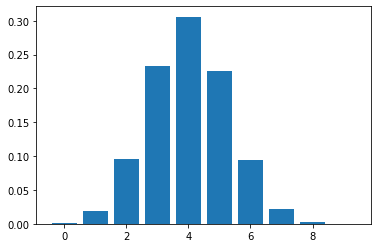

In [10]:
# set variables
# total pop
N = 30
# sample size
n = 10
# number of success in pop
X = 12
# number of success in sample
y = 8 

# set distribution
dist = hypergeom(N, X, n)
# set plot value range
x = np.arange(0, n)
# set distribution on range
dist_pmf = dist.pmf(x)
# plot distribution
plt.bar(x, dist_pmf)
plt.show()

In [11]:
# P(8 or more women being laid off by chance)
# k-1 to include 8 in cdf selection
# using distribution function
# 1 - hypergeom.cdf(y, N, X, n)

# re/set probability
prob = 0
prob_sum = 0

# set value to loop
i = 0

while i < y:
    nx_dif = N-X
    ny_dif = n-i

    comb_sel_suc = math.factorial(nx_dif) / (math.factorial(ny_dif) * math.factorial(nx_dif - ny_dif))
    comb_of_suc = math.factorial(X) / (math.factorial(i) * math.factorial(X - i))
    comb_of_samp_of_pop = math.factorial(N) / (math.factorial(n) * math.factorial(N - n))

    prob = (comb_sel_suc * comb_of_suc) / comb_of_samp_of_pop
    # print(f"Prob of {i} = {round(prob, 9)}")
    prob_sum += prob
    i += 1


print(1 - prob_sum)

0.002654716597745188


### Word 2 --> Exponential
Suppose you are traveling on business to a foreign country for the first time.  You do not have a bus schedule, but you have been told that buses stop in front of your hotel every twenty minutes.  If you show up at the bus stop at a random moment during the day, find the probability that

In [25]:
# set variables
mins = 20
bus = 1
lam = 1/mins
# set distribution
# dist = expon(lam)
# # set plot value range
# x = np.arange(1, mins)
# # set distribution on range
# dist_pdf = dist.pdf(x)
# # plot distribution
# plt.plot(x, dist_pdf)
# plt.xlabel(str(x))
# plt.show()

In [26]:
# a. You will wait for more than 10 mins
# using distribution function - not correct
# print(1 - dist.cdf(10))

# re/set probability
prob = 0
# set values
x = 10
prob = 1 - math.e**-(lam*x)

print(1-prob)

0.6065306597126334


In [28]:
# b. You will wait for 6 mins or less
# using distribution function
# dist.cdf(6)


# re/set probability
prob = 0
# set values
x = 6

prob = 1 - math.e**-(lam*x)

print(prob)

0.2591817793182821


In [30]:
# c. You will wait between 8 and 15 mins >> P(y<=7)
# using distribution function
# dist.cdf(7)



# P(8 <= x <15) = P(0<x<15) - p(0<x<8)

# re/set probability
prob = 0

# set values
x = 7

prob = 1 - math.e**-(lam*x)

print(prob)

0.29531191028128656
